In [1]:
import pandas as pd
import numpy as np
from plotnine import *

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
%%bash
rm -f arith.txt
find Benchs -name 'arith.txt' >> arith.txt

In [3]:
files = []
with open('arith.txt') as f:
    for line in f:
        files.append(line.strip())

In [4]:
# insts = ['Add', 'Sub', 'Xor', 'Shl', 'LShr', 'AShr', 'Mul', 'UDiv', 'SDiv', 'And', 'Or']
insts = ['Add', 'Sub', 'Xor', 'Mul', 'FAdd', 'FSub', 'FMul']
header = insts + [ x + '_total' for x in insts]

In [5]:
df = pd.DataFrame(columns=['Benchmark', 'Group'] + header)
for f in files:
    df2 = pd.read_csv(f, header=None).transpose()
    df2.columns = df2.iloc[0]
    df2 = df2[1:]
    d = dict()
    for h in insts:
        try:
            d[h] = float(df2.iloc[0][h])/float(df2.iloc[1][h])
        except:
            d[h] = 0.0
        d[h + '_total'] = df2.iloc[1][h]
    d['Benchmark'] = f.split('/')[1] if len(f.split('/')) == 3 else f.split('/')[2]
    d['file'] = '/'.join(f.split('/')[1:-1])
    d['Group'] = f.split('/')[1]
    df = df.append(d, ignore_index=True)

df = df.round(3)


for h in insts:
    df[h + '_total'] = df[h + '_total'].astype(np.int64)

In [6]:
df.head()

,Benchmark,Group,Add,Sub,Xor,Mul,FAdd,FSub,FMul,Add_total,Sub_total,Xor_total,Mul_total,FAdd_total,FSub_total,FMul_total,file
0,mandel-2,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/mandel-2
1,dt,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/dt
2,flops-5,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/flops-5
3,flops-2,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/flops-2
4,oourafft,Misc,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,Misc/oourafft


In [7]:
# df.to_clipboard(float_format='%.3f')

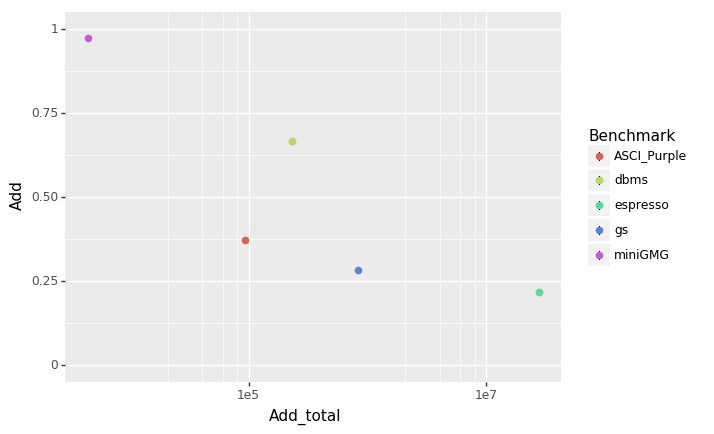

<ggplot: (288962224)>

In [8]:
(ggplot(df[(df.Add > 0.2) & (df.Add_total > 100)])
 + scale_x_log10()
 + geom_point(aes(x='Add_total', y='Add', fill='Benchmark'), stroke=0.02, size=3)
 + ylim((0, 1.0))
)

In [9]:
def get_column(df, cn, th=0.3, min_abs=100000):
    return df.query('({cn} >= {th}) & ({cn}_total >= {min_abs})'.format(cn=cn, th=th, min_abs=min_abs)) \
            .sort_values(by=cn)[['Group', 'Benchmark', 'file', cn, cn + '_total']]

### FAdd

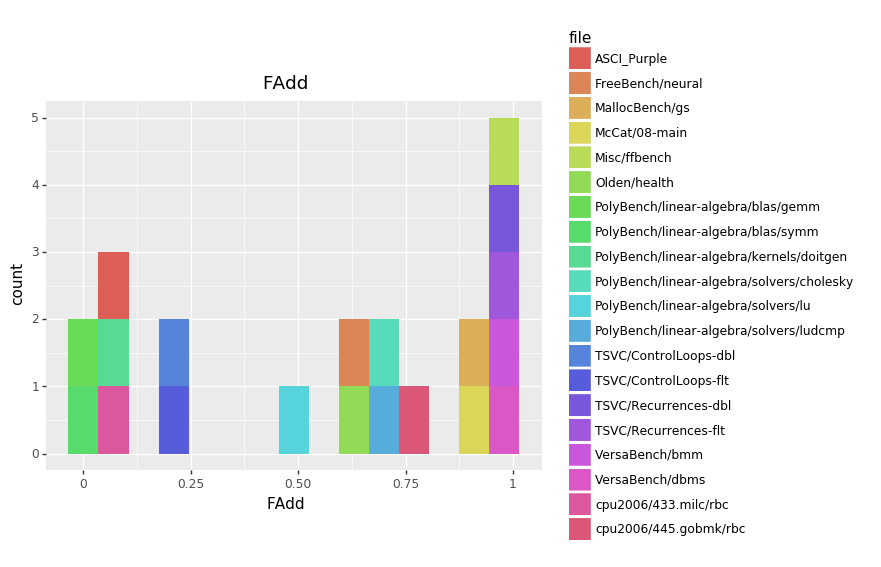

<ggplot: (-9223372036565764050)>

In [10]:
t = 'FAdd'
(ggplot(get_column(df, t, th=0.02, min_abs=0))
 + geom_histogram(aes(x=t, fill='file'), bins=15)
 + ggtitle(t)
)

In [13]:
get_column(df, 'FAdd', th=0, min_abs=0)

,Group,Benchmark,file,FAdd,FAdd_total
210,FreeBench,distray,FreeBench/distray,0.015,5261274
65,PolyBench,linear-algebra,PolyBench/linear-algebra/blas/symm,0.020,599400000
61,PolyBench,linear-algebra,PolyBench/linear-algebra/blas/gemm,0.021,1320000000
58,PolyBench,linear-algebra,PolyBench/linear-algebra/kernels/doitgen,0.045,537600000
194,ASCI_Purple,ASCI_Purple,ASCI_Purple,0.053,912325
145,cpu2006,433.milc,cpu2006/433.milc/rbc,0.073,15263520000
105,TSVC,ControlLoops-flt,TSVC/ControlLoops-flt,0.211,997120000
98,TSVC,ControlLoops-dbl,TSVC/ControlLoops-dbl,0.211,997120000
73,PolyBench,linear-algebra,PolyBench/linear-algebra/solvers/lu,0.500,5335333000
230,Olden,health,Olden/health,0.643,1250508
